In [1]:
from nonasymptotic.envs import StraightLine
from nonasymptotic.prm import SimplePRM

import matplotlib.pyplot as plt
import numpy as np

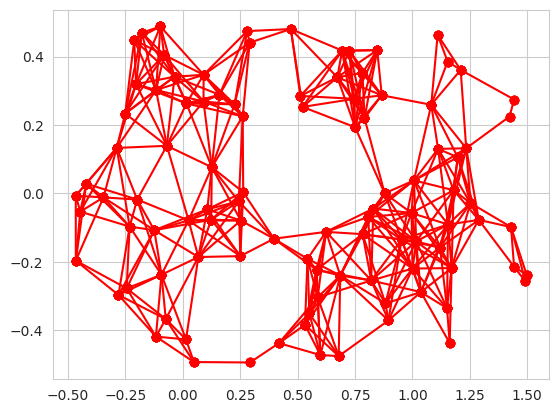

N Components: 1
N nodes: 100
N edges: 523


In [2]:
seed = 1
prm_env_2d = StraightLine(dim=2, delta_clearance=0.5, seed=seed)
prm = SimplePRM(0.25, prm_env_2d.is_motion_valid, prm_env_2d.sample_from_env, prm_env_2d.distance_to_path, seed=seed)
prm.grow_to_n_samples(100)


plt.figure()
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

plt.show()

# some other computations to help other visual tests later on:
print('N Components: %i' % len(prm.g_cc.getComponents()))
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


N nodes: 100
N edges: 523


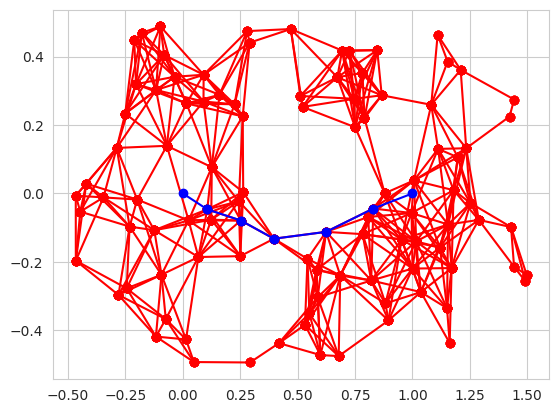

In [3]:
# do some connection queries with some existing points
s = np.array([0., 0.])
g = np.array([1., 0.])

sol_dist, sol_path = prm.query_best_solution(s, g)
sol_path = np.concatenate([[s], sol_path, [g]])

plt.figure()

# plot the existing prm
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

for i in range(sol_path.shape[0] - 1):
    u = sol_path[i]
    v = sol_path[i+1]
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')

plt.plot()
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


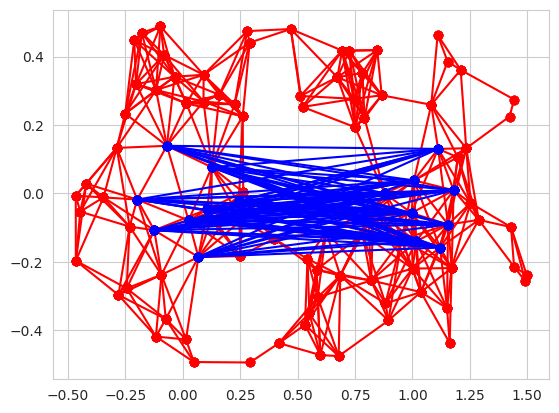

In [4]:
pairs, _ = prm.query_all_graph_connections(s, g)
plt.figure()

# plot the existing prm
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

for u, v in pairs:
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')

plt.show()


In [5]:
# for _ in range(100):
#     prm_env_2d.is_prm_epsilon_delta_complete(prm, 0.225, n_samples_per_check=1000, timeout=5.0, vis=True)

In [7]:
start = np.array([0.74071731, 0.0])
goal = np.array([0.94071731, 0.0])

dist, path = prm.query_best_solution(start, goal)
print(dist - (1 + 0.225) * (goal[0] - start[0]))


-0.044998454749584305
